# ■ 편미분

구글에서 z = x^2 + y^2 검색

<div>
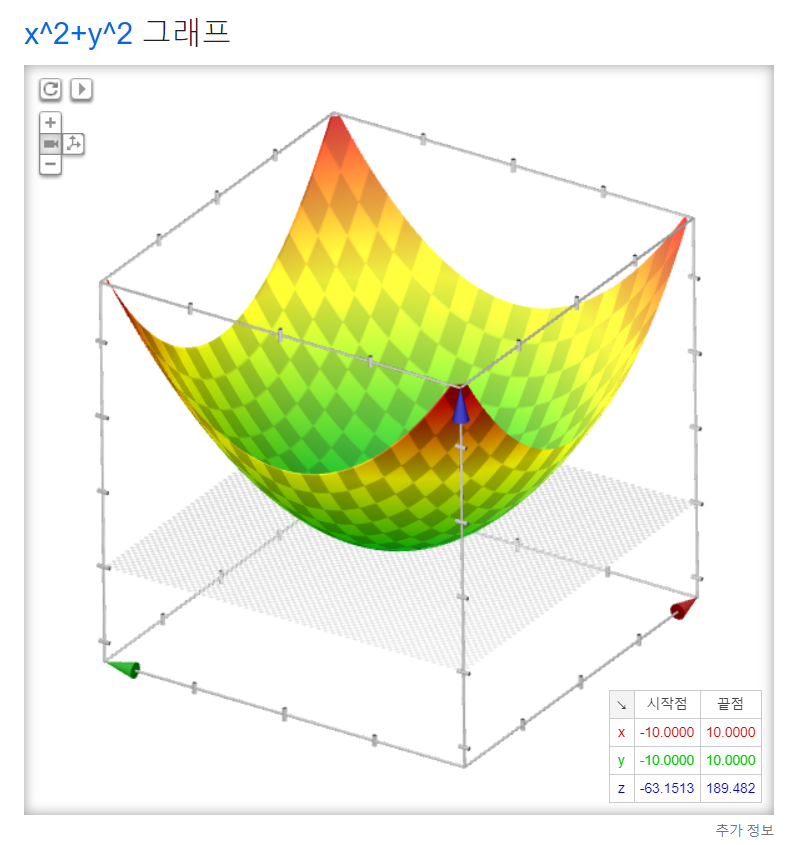
</div>

변수가 2개 이상인 함수를 미분할 때 미분 대상 변수외에 나머지 변수를 상수처럼 고정시켜
미분하는 것을 편미분이라고 합니다.

    w1 = w1 - 기울기  -------->  기울기가 0이 될때까지 계속 w1 을 갱신
    w2 = w2 - 기울기  -------->  기울기가 0이 될때까지 계속 w2 를 갱신

가중치를 w1 만 갱신하면 안되고 w2 와 w3 도 갱신해줘야하기 때문에 편미분이 딥러닝에서 필요한 것입니다.

## 문제74. 아래의 수학식을 손으로 편미분해서 x1=4 일 때와 x2=3 일 때의 기울기를 구하시오

$$f(x)=2x_1^2+3x_2^2+4$$

$${\operatorname{d}\!f\over\operatorname{d}\!x_1} = 4x_1 = 4 * 4 = 16$$

$${\operatorname{d}\!f\over\operatorname{d}\!x_2} = 6x_2 = 6 x 3 = 18$$

## 문제75. 아래의 수학식을 오차함수로 생하시오

$$f(x_0, x_1) = x_0^2 + x_1^2$$

In [1]:
import numpy as np

x = np.array([3.0, 4.0])

def loss_func(x):
    return x[0]**2 + x[1]**2

print(loss_func(x))

25.0


## 문제76. 위의 loss_func() 함수를 x0=3, x1=4 에서 x0 에 대해 편미분했을때의 기울기는 ?

In [2]:
def loss_func(x):
    return x[0]**2 + x[1]**2

def numerical_diff(f, x):
    h = 0.0001   # 극한값을 구현
    return ( f(x+h) - f(x-h) ) / (2*h)

def function_tmp1(x0):
    return x0**2 + 4**2   # x1 을 상수취급

print( numerical_diff(function_tmp1, 3) )

6.00000000000378


설명: 6.00000000000378 --> 6 이 아니라 뒤에 378 이 나온 것은 중앙차분오차

## 문제77. 위의 loss_func() 함수를 x0=3, x1=4 에서 x1 에 대해 편미분했을때의 기울기는 ? 

In [14]:
def loss_func(x):
    return x[0]**2 + x[1]**2

def numerical_diff(f, x):
    h = 0.0001   # 극한값을 구현
    return ( f(x+h) - f(x-h) ) / (2*h)

def function_tmp2(x1):
    return 3**2 + x1**2   # x0 을 상수취급

print( numerical_diff(function_tmp2, 4) )   

7.999999999999119


※ 위의 편미분 방법은 손으로 나머지 하나를 상수화 시켜서 강제로 구현한 코드이므로 파이썬으로 알아서 편미분 되도록 다시 함수를 생성해야 합니다.

# ■ 편미분하는 numerical_gradient 함수 만들기

In [ ]:
import numpy as np

def numerical_gradient(f,x):
    h = 0.0001
    grad = np.zeros_like(x)  # x 와 형상이 같은 배열을 생성 : [0,0]
    
    for i in range(x.size):  # 0, 1
        tmp_val = x[i]  # x[0] , 3.0 이 tmp_val 에 담긴다
        
        # f(x+h) 계산
        x[i] = tmp_val + h # [3.0001, 4.0]
        fxh1 = f(x)   # 3.0001**2 + 4.0**2 = 25.00060001
        
        # f(x-h) 계산
        x[i] = tmp_val - h  # 3.0 - 0.0001 = 2.999 # [2.9999, 4.0]
        fxh2 = f(x)  # 2.9999**2 + 4.0**2 = 24.99940001
        
        grad[i] = (fxh1 - fxh2) / (2*h)  # (25.00060001 - 24.99940001) / (2*0.0001)
        x[i] = tmp_val   # [6.00000000000378, 0]

## 문제78. 위의 함수를 방금 한 것처럼 다시 디버깅하는데 i 가 1일 때를 디버깅하시오

In [23]:
import numpy as np

def numerical_gradient(f,x):
    h = 0.0001
    grad = np.zeros_like(x)  # x 와 형상이 같은 배열을 생성 : [0,0]
    
    for i in range(x.size):  # 0, 1
        tmp_val = x[i]  # x[1] , 4.0 이 tmp_val 에 담긴다
        
        # f(x+h) 계산
        x[i] = tmp_val + h # [3.0, 4.0001]
        fxh1 = f(x)   # 3.0**2 + 4.0001**2 = 25.00080001
        
        # f(x-h) 계산
        x[i] = tmp_val - h  # 4.0 - 0.0001 = 3.9999 # [3.0, 3.9999]
        fxh2 = f(x)  # 3.0**2 + 3.9999**2 = 24.99920001
        
        grad[i] = (fxh1 - fxh2) / (2*h)  # (25.00080001 - 24.99920001) / (2*0.0001)
                             # [6.00000000000378, 7.999999999999119]
        x[i] = tmp_val  # [3.0, 4.0]
        
    return grad

print(numerical_gradient(loss_func, np.array([3.0, 4.0])))

[6. 8.]


# ■ 경사하강법

위에서 만든 numerical_gradient 함수는 산에서 내려오기 위해서 내가 서있는 곳에서  
어느쪽으로 가야 산 아래로 내려갈 수 있는지 내가 서있는곳의 기울기를 구는 함수입니다.

    가중치 = 가중치 - 기울기

위의 식을 loop 문으로 계속 반복해서 수행해서 기울기가 0 이 되면 가중치가 변경이 안되므로  
그 시점까지 수행을 해서 최적의 가중치를 알아낼 것입니다.

    가중치 = 가중치 - 학습률 * 기울기
                        ↓
                학습률(learning rate) ? 한번의 학습으로 얼마만큼 매개변수를 갱신할지를 결정하는 하이퍼 파라미터

학습률은 개발자가 0.01 나 0.001 등과 같이 알아서 정해줘야하는데  
일반적으로 이 값이 너무 크거나 너무 작으면 global minima 를 찾아갈 수가 없다.

    학습률이 너무 ↑  -------->  학습은 빠르지만 global minimum 을 지나칠 수 있다.

    학습률이 너무 ↓  -------->  global minimum 을 지나칠 염려는 없지만 학습이 너무 느려서 수렴을 못한다.

## 문제79. 위에서 만든 numerical_gradient 함수를 이용해서 경사하강을 하는 gradient_decent 함수를 생성하시오

In [24]:
def gradient_decent(f, init_x, lr=0.01, step_num = 100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x

## 문제80. 함수 f(x0, x1) = x0**2 + x1**2 함수를 오차함수로 두고 처음 지점을 [-3.0, 4.0] 으로 하고 계속 경사하강을 해서 최소 지점인 [0,0] 으로 경사하강되게하시오

In [26]:
def loss_func(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])

a = gradient_decent(loss_func, init_x, lr=0.1, step_num=100)
print(a.round())

[-0.  0.]


## 문제81. 학습률을 0.1로 하지 말고 너무 ㅋ작은 값으로 주어서 최소 지점에 도달하지 못하는지 확인하시오

In [35]:
def loss_func(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])

a = gradient_decent(loss_func, init_x, lr=0.0000001, step_num=100)
print(a)

[-2.99994  3.99992]
